In [60]:
import pandas as pd
import numpy as np
from scipy import integrate
import seaborn as sns
import matplotlib.pyplot as mp
import plotly.offline as pyo
import plotly.graph_objs as go;
import pandas_datareader as datareader
import datetime as dt
import math
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings('ignore')


### Problem Statement 1: 

The data (sample) were collected in São Paulo — Brazil, in a university, where there are some parties with groups of students from 18 to 28 years of age(average). The dataset used for this activity has 7 attributes, being a Target, with a period of one year. You have to predict the quantity of beer consumption basedon the features that contain climate conditions.

##### Dataset Description:
I.Data: date of the record

II.Temperatura Media (C): Average temperature of the day in celsius

III.Temperatura Minima (C): Minimum temperature of the day in celsius

IV.TemperaturaMaxima (C): Maximum temperature of the day in celsius

V.Precipitacao (mm): Percipitation in mm

VI.Final de Semana: If the day is the weekend or not

VII.Consumo de cerveja (litros): Beer consumption in liters

Write a Python code to perform the following tasks mentioned:

1.Load the dataset, check its shape

2.Rectify the data of the first four columns Hint:Check columns 'Temperatura Media (C)', 'Temperatura Minima (C)', 'TemperaturaMaxima (C)', and 'Precipitac’Fix the following errors present in these features

3.Create new features using the 'Data' feature and the make 'Data' column as indexHint:

Create a new feature 'Month' from the dates, consisting of the month of the year.

Create a new feature 'Day' from the dates, consisting of the day of the week.

Set values from the 'Data' column as indexes. Use code snippet:df1.set_index('Data',inplace=True)

4.Handle null and duplicate values 

5.Check the data typeof the features and convert them to the appropriate data type 

6.Analyze features with outlier values  

7.Plot and analyze the correlation 

8.Split the dataset for training and testing 

9.Train a linear regression model and print the intercept and coefficients 10.Evaluate the model using the R2 score, mean absolute error, and root mean squared error 

In [61]:
data=pd.read_csv("D:\Shivam\study material\CSV\Consumo_cerveja.csv")
data


,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data.rename(columns={'Data':'Date','Temperatura Media (C)':'Median_temp','Temperatura Minima (C)':'Minimum_temp','Temperatura Maxima (C)':'Maximum_temp','Precipitacao (mm)':'Percipitation','Final de Semana':'Weekend','Consumo de cerveja (litros)':'Consumption_in_liters'},inplace=True)
data

,Date,Median_temp,Minimum_temp,Maximum_temp,Percipitation,Weekend,Consumption_in_liters
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
data.isnull().sum()

Date                     576
Median_temp              576
Minimum_temp             576
Maximum_temp             576
Percipitation            576
Weekend                  576
Consumption_in_liters    576
dtype: int64

### there seems to be miss interpretation while collecting data from the source as our data contains null values that are not meant to be here


### keeping the only nan-null values

In [86]:
data=data.iloc[0:365]
data

,Median_temp,Minimum_temp,Maximum_temp,Percipitation,Weekend,Consumption_in_liters,Day_of_the_week,Month_name
Date,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Thursday,January
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Friday,January
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Saturday,January
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday,January
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Monday,January
...,...,...,...,...,...,...,...,...
2015-12-27,24.00,21.1,28.2,8.0,1.0,32.307,Sunday,December
2015-12-28,22.64,21.1,26.7,0.0,0.0,26.095,Monday,December
2015-12-29,21.68,20.3,24.1,8.0,0.0,22.309,Tuesday,December


In [65]:
data.set_index(data['Date'],inplace=True)
data

,Date,Median_temp,Minimum_temp,Maximum_temp,Percipitation,Weekend,Consumption_in_liters
Date,,,,,,,
2015-01-01,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
2015-01-02,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2015-01-03,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
2015-01-04,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
2015-01-05,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
2015-12-27,2015-12-27,24,"21,1","28,2","13,6",1.0,32.307
2015-12-28,2015-12-28,"22,64","21,1","26,7",0,0.0,26.095
2015-12-29,2015-12-29,"21,68","20,3","24,1","10,3",0.0,22.309


In [66]:
data['Date']=pd.to_datetime(data['Date'])

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   365 non-null    datetime64[ns]
 1   Median_temp            365 non-null    object        
 2   Minimum_temp           365 non-null    object        
 3   Maximum_temp           365 non-null    object        
 4   Percipitation          365 non-null    object        
 5   Weekend                365 non-null    float64       
 6   Consumption_in_liters  365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 22.8+ KB


In [68]:
data['Day_of_the_week']=data['Date'].dt.day_name()
data['Month_name']=data['Date'].dt.month_name()
data.drop('Date',inplace=True,axis=1)
data.head()

,Median_temp,Minimum_temp,Maximum_temp,Percipitation,Weekend,Consumption_in_liters,Day_of_the_week,Month_name
Date,,,,,,,,
2015-01-01,"27,3","23,9","32,5",0,0.0,25.461,Thursday,January
2015-01-02,"27,02","24,5","33,5",0,0.0,28.972,Friday,January
2015-01-03,"24,82","22,4","29,9",0,1.0,30.814,Saturday,January
2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799,Sunday,January
2015-01-05,"23,82",21,"28,3",0,0.0,28.900,Monday,January


In [69]:
num_coloumn=['Median_temp','Minimum_temp','Maximum_temp','Percipitation']

for i in range(len(num_coloumn)):
    data[num_coloumn[i]]=data[num_coloumn[i]].str.replace(",",'.')
    data[num_coloumn[i]]=pd.to_numeric(data[num_coloumn[i]])
data.head()

,Median_temp,Minimum_temp,Maximum_temp,Percipitation,Weekend,Consumption_in_liters,Day_of_the_week,Month_name
Date,,,,,,,,
2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,Thursday,January
2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,Friday,January
2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,Saturday,January
2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,Sunday,January
2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,Monday,January


In [70]:
data.isnull().sum()### contain no null values

Median_temp              0
Minimum_temp             0
Maximum_temp             0
Percipitation            0
Weekend                  0
Consumption_in_liters    0
Day_of_the_week          0
Month_name               0
dtype: int64

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2015-01-01 to 2015-12-31
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Median_temp            365 non-null    float64
 1   Minimum_temp           365 non-null    float64
 2   Maximum_temp           365 non-null    float64
 3   Percipitation          365 non-null    float64
 4   Weekend                365 non-null    float64
 5   Consumption_in_liters  365 non-null    float64
 6   Day_of_the_week        365 non-null    object 
 7   Month_name             365 non-null    object 
dtypes: float64(6), object(2)
memory usage: 25.7+ KB


In [72]:
data.describe()

,Median_temp,Minimum_temp,Maximum_temp,Percipitation,Weekend,Consumption_in_liters
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


<AxesSubplot: xlabel='Consumption_in_liters'>

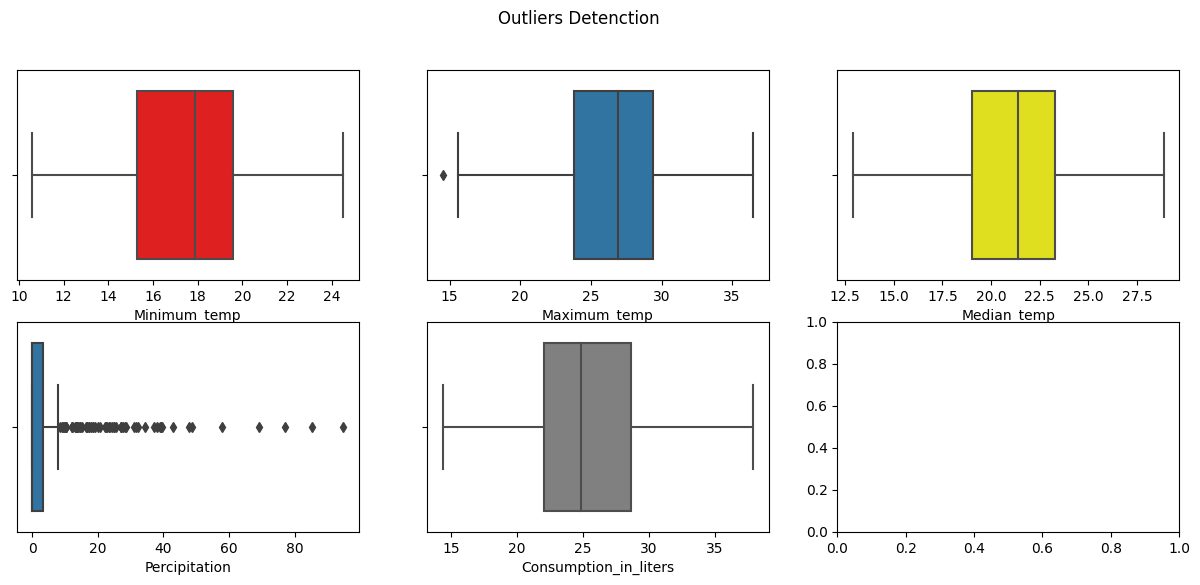

In [73]:
fig,axs=mp.subplots(2,3,figsize=(15,6))
fig.suptitle("Outliers Detenction")
sns.boxplot(ax=axs[0,0],x=data['Minimum_temp'],color='red')
sns.boxplot(ax=axs[0,1],x=data['Maximum_temp'])
sns.boxplot(ax=axs[0,2],x=data['Median_temp'],color='yellow')
sns.boxplot(ax=axs[1,0],x=data['Percipitation'])
sns.boxplot(ax=axs[1,1],x=data['Consumption_in_liters'],color='grey')

### From the above plots we can say that percipitation has more number of outliers values.


### let us check the correlation of Percipitation with our target variable before and after handling outliers

In [74]:
data.corr()

,Median_temp,Minimum_temp,Maximum_temp,Percipitation,Weekend,Consumption_in_liters
Median_temp,1.000000,0.862752,0.922513,0.024416,-0.050803,0.574615
Minimum_temp,0.862752,1.000000,0.672929,0.098625,-0.059534,0.392509
Maximum_temp,0.922513,0.672929,1.000000,-0.049305,-0.040258,0.642672
Percipitation,0.024416,0.098625,-0.049305,1.000000,0.001587,-0.193784
Weekend,-0.050803,-0.059534,-0.040258,0.001587,1.000000,0.505981
Consumption_in_liters,0.574615,0.392509,0.642672,-0.193784,0.505981,1.000000


### clearliy it is highly negative correlated with our target variable

##### Let try to cap outliers

In [75]:
per_25=np.percentile(data['Percipitation'],25)
per_75=np.percentile(data['Percipitation'],75)
upper_per=per_75+1.5*(per_75-per_25)
lower_per=per_25-1.5*(per_75-per_25)

<AxesSubplot: >

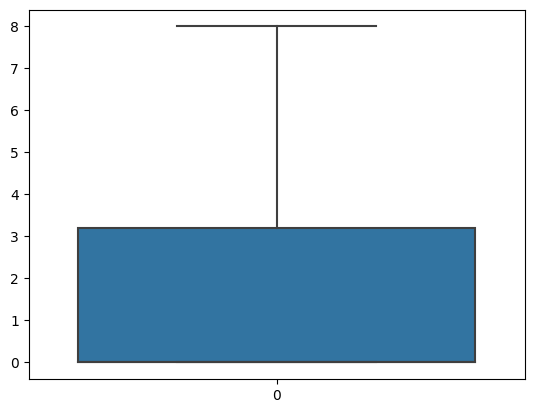

In [76]:
data['Percipitation']=np.where(data['Percipitation']>upper_per,upper_per,np.where(data['Percipitation']<lower_per,lower_per,data['Percipitation']))
sns.boxplot(data['Percipitation'])

### outliers has been removed and data is left skewed now

In [77]:
data.corr()

,Median_temp,Minimum_temp,Maximum_temp,Percipitation,Weekend,Consumption_in_liters
Median_temp,1.000000,0.862752,0.922513,0.000181,-0.050803,0.574615
Minimum_temp,0.862752,1.000000,0.672929,0.133601,-0.059534,0.392509
Maximum_temp,0.922513,0.672929,1.000000,-0.109233,-0.040258,0.642672
Percipitation,0.000181,0.133601,-0.109233,1.000000,0.002618,-0.191539
Weekend,-0.050803,-0.059534,-0.040258,0.002618,1.000000,0.505981
Consumption_in_liters,0.574615,0.392509,0.642672,-0.191539,0.505981,1.000000


## it is still negative correlated with our target variables

In [78]:
### we are using all the feature for training except our Percipitation feature

In [79]:
x=data.iloc[:,0:5]
x.drop('Percipitation',inplace=True,axis=1)### independent variables
y=data['Consumption_in_liters']### dependent variables

In [80]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=40)

In [81]:
len(xtrain),len(xtest),len(ytrain),len(ytest)

(292, 73, 292, 73)

In [82]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrain,ytrain)
y_pred=lr.predict(xtest)
y_pred

array([25.0435597 , 25.22673866, 24.55418403, 18.74890756, 29.82064845,
       34.08045731, 18.15772723, 24.81905863, 21.26514881, 27.64523912,
       26.55944492, 23.30715595, 26.4077494 , 27.33314395, 27.55483394,
       29.44895265, 30.22744818, 25.21562135, 29.12369276, 19.99928764,
       29.39540345, 22.36014695, 28.13532729, 27.83434912, 28.25343824,
       24.15267203, 30.50379641, 20.2321029 , 21.33914338, 28.84373858,
       23.78529094, 26.33816181, 21.73198067, 21.05567809, 20.791481  ,
       28.72824553, 24.87068755, 18.09611809, 17.86317165, 25.01929524,
       24.4576674 , 24.15866461, 25.8269176 , 17.99791549, 28.23001204,
       23.77783227, 24.49446845, 20.62463355, 28.95946846, 24.91071978,
       25.44959771, 24.47370443, 27.66014461, 22.43215942, 27.42280992,
       30.92874916, 24.17447919, 31.79968406, 31.97103352, 26.61048578,
       30.33870848, 27.45252573, 27.85416637, 26.09449192, 29.92521149,
       21.60267075, 24.75887311, 26.81952828, 24.28455302, 27.08

In [83]:
lr.coef_,lr.intercept_

(array([ 0.01285538, -0.06459807,  0.68857679,  5.14039753]),
 6.474340976643514)

In [84]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("R2 score",r2_score(ytest,y_pred))
print("Root Mean squared error",np.sqrt(mean_squared_error(ytest,y_pred)))
print("Mean absolute error",mean_absolute_error(ytest,y_pred))

R2 score 0.7479217062242683
Root Mean squared error 2.238188385498673
Mean absolute error 1.8668748797504535


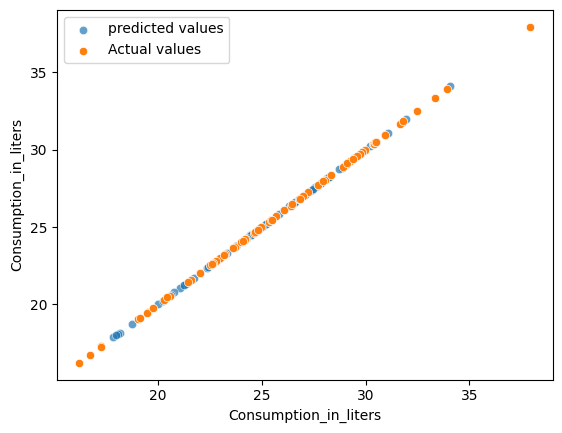

In [85]:
sns.scatterplot(x=y_pred,y=y_pred,label='predicted values',alpha=0.7)
sns.scatterplot(x=ytest,y=ytest,label='Actual values')
mp.legend()
mp.show()


### Git Link :https://github.com/Shanezatch/Learnerhub/blob/76e6c3f3f693c770b0f903d709aee290e2db7d0a/IPYTHON/Assignment%204.question%201.ipynb